# Figures for the SAT/UNSAT transition of ellipsoid fitting

In [1]:
import numpy as np
import pickle, time, copy
import glob
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os, re
colors = list(mcolors.TABLEAU_COLORS)
import os.path
plt.rcParams.update({'font.size': 15})

## The plot of $\mu_c(x)$, and comparisons with numerical simulations

In [2]:
#Analytical prediction

def muc(x):
    if x <= 0 or x >= 3*np.pi/2  >= 2:
        return 0.
    else:
        return 4*np.sqrt(9.*np.pi**2 - 4*x**2) / (9.*np.pi**3)

In [3]:
#Loading numerical simulations of Tim, for d = 100 and alpha = 0.24
HISTOGRAM_KWARGS = {
    'facecolor': 'darkgray',
    'edgecolor': 'black',
    'linewidth': 1}

pattern = '../Data/finite_size/evals__sdp__d100__a0_24__t*.csv'

evalss = []

for filename in glob.glob(pattern):
    evals = np.loadtxt(filename)
    evalss.append(evals)
all_evals = np.hstack(evalss)
print(len(evalss))

50


The weight of zero eigenvalues is 0.52


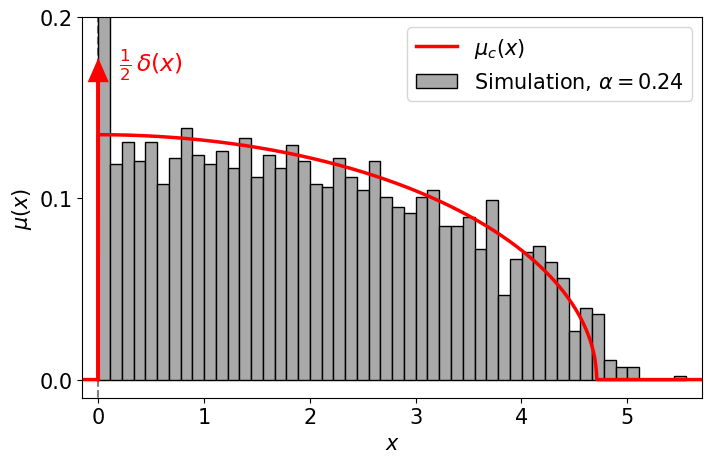

In [4]:
width = 8
height = width / ((np.sqrt(5.)+1)/2.) #Golden ratio
fig, ax = plt.subplots(1, 1,figsize = (width,height))
xs = np.linspace(-2, 10, num = 10000)

values = np.array([muc(x) for x in xs])
ax.plot(xs, values, label = r'$\mu_c(x)$', linewidth = 2.5, color = 'red', zorder = 1)
ax.arrow(0, 0, 0, 0.175, head_width = 0.15, head_length = 0.01, length_includes_head = True, color = 'red', linewidth = 2.5, zorder = 1)
ax.text(0.2, 0.17, r'$\frac{1}{2} \, \delta(x)$',color = 'red', fontsize = 17)

ax.plot([-10,50],[0., 0.], '--', linewidth=1.5, color='grey', zorder = 0)
ax.plot([0,0],[-10., 10.], '--', linewidth=1.5, color='grey', zorder = 0)
ax.set_yticks([0,0.1,0.2])

trunc = 1e-3 #Truncation for the zero eigenvalues
ax.hist(all_evals, bins=50, density=True, **HISTOGRAM_KWARGS, zorder = 0, label = r'Simulation, $\alpha = 0.24$')
print(f"The weight of zero eigenvalues is {np.size(all_evals[np.abs(all_evals) <= trunc])/np.size(all_evals)}")

ax.legend(fancybox=True,loc = 'upper right')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\mu(x)$')
ax.set_ylim(-0.01,0.2)
ax.set_xlim(-0.15,3.*np.pi/2+1)
plt.savefig('../Figures/muc_sat_unsat.pdf', bbox_inches='tight')

## A sketch of the evolution of $\mu[\alpha](x)$ and $\Gamma(\mathbf{x})$

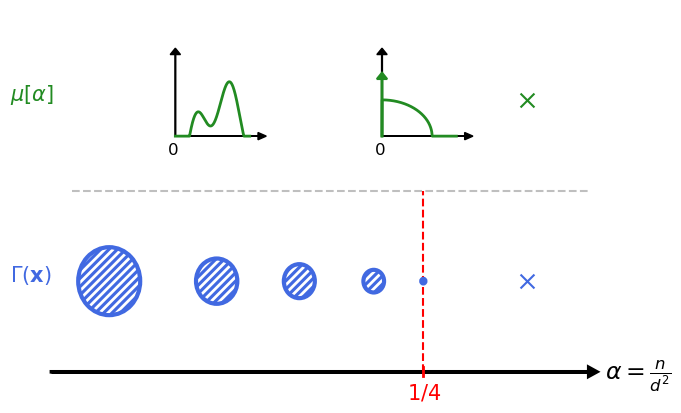

In [5]:
from matplotlib.patches import Circle, Ellipse
matplotlib.rcParams['hatch.linewidth'] = 2.25  # previous pdf hatch linewidth

width = 8
height = width / ((np.sqrt(5.)+1)/2.) #Golden ratio
fig, ax = plt.subplots(1, 1,figsize = (width,height))
xs = np.linspace(-2, 10, num = 10000)
ax.axis('off')
ax.set_xlim(0,3/4)
ax.set_ylim(-0.1,2)

pos_Gamma = 0.5
pos_mu = 1.5

ax.arrow(0.05, 0, 0.65, 0., head_width = 0.05, head_length = 0.01, length_includes_head = False, color = 'black', linewidth = 2.5, zorder = 1)
ax.text(0.72, -0.04, r'$\alpha = \frac{n}{d^2}$',color = 'black', fontsize = 17)
ax.text(0.48, -0.15, r'$1/4$',color = 'red')
ax.plot([0.5,0.5], [-0.025,0.025] ,color = 'red',linewidth = 2)
ax.plot([0.5,0.5],[0., 1.], '--', linewidth=1.5, color='red', zorder = 0)
ax.plot([0.075,0.7],[1., 1.], '--', linewidth=1.5, color='grey', zorder = 0, alpha = 0.5)

ax.text(0., pos_Gamma, r'$\Gamma(\mathbf{x})$',color = 'RoyalBlue')
ax.text(0., pos_mu, r'$\mu[\alpha]$',color = 'ForestGreen')

factor = 1.5
circle = Ellipse((0.12, pos_Gamma), factor*0.05, factor*0.25, edgecolor='RoyalBlue', linewidth=3, alpha=1, hatch='////', fill = False)
ax.add_patch(circle)
factor = 1.
circle = Ellipse((0.25, pos_Gamma), factor*0.05, factor*0.25, edgecolor='RoyalBlue', linewidth=3, alpha=1, hatch='////', fill = False)
ax.add_patch(circle)
factor = 0.75
circle = Ellipse((0.35, pos_Gamma), factor*0.05, factor*0.25, edgecolor='RoyalBlue', linewidth=3, alpha=1, hatch='////', fill = False)
ax.add_patch(circle)
factor = 0.5
circle = Ellipse((0.44, pos_Gamma), factor*0.05, factor*0.25, edgecolor='RoyalBlue', linewidth=3, alpha=1, hatch='////', fill = False)
ax.add_patch(circle)
factor = 0.1
circle = Ellipse((0.5, pos_Gamma), factor*0.05, factor*0.25, edgecolor='RoyalBlue', linewidth=3, alpha=1, hatch='////', fill = False)
ax.add_patch(circle)
ax.scatter(0.625, pos_Gamma, s = 100, marker = 'x', color = 'RoyalBlue')


x_value = 0.2
x_min, x_shift, y_base = x_value, 0.1, pos_mu-0.2
ax.arrow(x_value, y_base, x_shift, 0., head_width = 0.04, head_length = 0.01, length_includes_head = False, color = 'black', linewidth = 1, zorder = 0)
ax.arrow(x_value, y_base, 0, 0.45, head_width = 0.0125, head_length = 0.035, length_includes_head = False, color = 'black', linewidth = 1, zorder = 0)
ax.text(x_value-0.01, y_base - 0.1, r'$0$',color = 'black', fontsize = 12)
xs = np.linspace(0,1, num = 1000)
def func(x):
    value = np.sin(x*np.pi/2)**2 + np.sin(2*x*np.pi/2)**2 + np.sin(4*x*np.pi/2)**2 - 4./np.pi
    return max(0, value)

values = np.array([func(x) for x in xs])
#I rescale the xs to fit in my windows
xs_rescaled = (xs/np.amax(xs))*0.9*x_shift + x_min
values_rescaled = (values/np.amax(values))*0.3 + y_base
ax.plot(xs_rescaled, values_rescaled, color = 'ForestGreen', linewidth = 2, zorder = 1)

x_value = 0.45
x_min, x_shift, y_base = x_value, 0.1, pos_mu-0.2
ax.arrow(x_value, y_base, x_shift, 0., head_width = 0.04, head_length = 0.01, length_includes_head = False, color = 'black', linewidth = 1, zorder = 0)
ax.arrow(x_value, y_base, 0, 0.45, head_width = 0.0125, head_length = 0.035, length_includes_head = False, color = 'black', linewidth = 1, zorder = 0)
ax.text(x_value-0.01, y_base - 0.1, r'$0$',color = 'black', fontsize = 12)
ax.arrow(x_value, y_base, 0, 0.35, head_width = 0.0125, head_length = 0.035, length_includes_head = True, color = 'ForestGreen', linewidth = 1.5, zorder = 1)
xs = np.linspace(0,7, num = 1000)
values = np.array([muc(x) for x in xs])
#I rescale the xs to fit in my windows
xs_rescaled = (xs/np.amax(xs))*0.9*x_shift + x_min
values_rescaled = (values/np.amax(values))*0.2 + y_base
ax.plot(xs_rescaled, values_rescaled, color = 'ForestGreen', linewidth = 2, zorder = 1)

ax.scatter(0.625, pos_mu, s = 100, marker = 'x', color = 'ForestGreen')

plt.savefig('../Figures/sketch_sat_unsat.pdf', bbox_inches='tight')

## The constraint $\mathbf{S} \succeq \kappa \mathrm{I}_d$ for $\kappa \geq 0$

In [6]:
# A solver for alpha_c(kappa)
#G_k(r) = \int_{-2}^r \rho_sc(x) x^k dx
from scipy import optimize

def G0(r):
    if r <= -2:
        return 0 
    elif r >= 2:
        return 1
    else: 
        return (r*np.sqrt(4.-r**2) + 8*np.arctan((2+r)/np.sqrt(4.-r**2)))/(4*np.pi)

def G1(r):
    if r <= -2:
        return 0 
    elif r >= 2:
        return 0.
    else: 
        return -(4-r**2)**(3./2)/(6*np.pi)
    
def G2(r):
    if r <= -2:
        return 0 
    elif r >= 2:
        return 1
    else: 
        return (r*(r**2-2)*np.sqrt(4.-r**2) + 16*np.arctan((2+r)/np.sqrt(4.-r**2)))/(8*np.pi)
    
def m_f(kappa):
    return - kappa / (1. - kappa)

def sigma_f(kappa):
    mv = m_f(kappa)
    def to_zero(sigma):
        y = (kappa - mv)/sigma
        return (mv-1.) + (kappa-mv)*G0(y) - sigma*G1(y)
    sol = optimize.root_scalar(to_zero, x0 = (1./(1.-kappa)))
    return sol.root

def alphac(kappa):
    mv = m_f(kappa)
    sv = sigma_f(kappa)
    y = (kappa - mv)/sv
    return (mv**2+sv**2)/(2.*sv**2) + (kappa**2 - mv**2)*G0(y)/(2*sv**2) - mv*G1(y)/sv - (1./2)*G2(y)

def d(alpha): 
    #The function [alpha_c^(-1)[alpha]]^{-1/2}
    sol = optimize.root_scalar(lambda kappa: alphac(kappa) - alpha, x0 = 0.5)
    return 1./np.sqrt(sol.root)

In [7]:
kappas = np.linspace(0, 1, 1000, endpoint = False) 
alphacs = np.array([alphac(kappa) for kappa in kappas])

alphas = np.linspace(0, 0.25, 1000, endpoint = False) 
ds = np.array([d(alpha) for alpha in alphas])

/home/antoine/anaconda3/lib/python3.10/site-packages/scipy/optimize/_zeros_py.py:315: RuntimeWarning: Derivative was zero.
  warnings.warn(msg, RuntimeWarning)


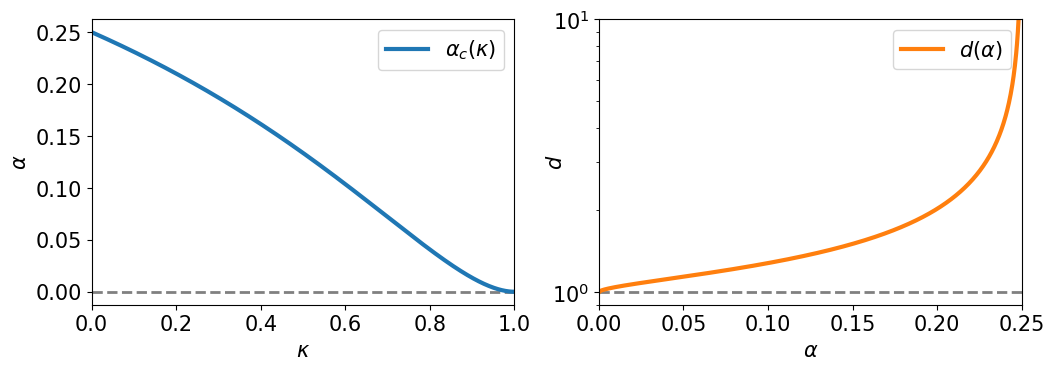

In [8]:
width = 6
height = width / ((np.sqrt(5.)+1)/2.) #Golden ratio
fig, axes = plt.subplots(1, 2,figsize = (2*width,height))
ax=axes[0]
ax.plot(kappas, alphacs , linewidth = 3, color = colors[0], label = r'$\alpha_c(\kappa)$')
ax.plot([0.,200],[0,0], '--', linewidth=2, zorder=0, color='grey')
ax.set_xlim(0., 1)
ax.set_xlabel(r'$\kappa$')
ax.set_ylabel(r'$\alpha$')
ax.legend(fancybox=True,loc = 'best')

ax = axes[1]
ax.plot(alphas, ds, linewidth = 3, color = colors[1], label = r'$d(\alpha)$')
ax.plot([0.,200],[1,1], '--', linewidth=2, zorder=0, color='grey')
ax.set_xlim(0., 0.25)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$d$', labelpad = -10)
ax.set_yscale('log')
ax.set_ylim(0.9,10)
ax.legend(fancybox=True,loc = 'best')

plt.savefig('../Figures/setting_kappa.pdf', bbox_inches='tight')